### 네이버 뉴스 크롤링 분석
- 데이터 수집 -> 전체, 카테고리별 데이터프레임 생성
- 데이터 전처리 : 중복행 결측치 불용어 공백 제거 / stopword 찾아서 적용
- 키워드 분석 & 시각화

In [ ]:
# 과제 0726

네이버 카테고리별 기사를 아래 카테고리 정의를 기준으로 크롤링한 후 불필요한 공백을 제거하고 한글만으로 된 데이터 프레임을 출력하세요.
(용도는 전체, 카테고리별 키워드 분석을 위한 시각화임을 감안하여 데이터 수집 및 전처리 수행)
- 카테고리 정의
    - 100 정치
        - (대통령실[264] + 국회/정당[265] + 북한[268] + 국방/외교[267])

    - 101 경제
        - (금융[259] + 증권[258] + 산업/재계[261] + 글로벌 경제[262] + 부동산[260])

    - 103 생활/문화
        - (건강정보[241] + 여행/레저[237] + 공연/전시[242] + 날씨[248] + 생활문화 일반[245])

    - 105 IT/과학
        - (통신/뉴미디어[227] + IT 일반[230] + 컴퓨터[283] + 과학 일반[228])

- 카테고리별 1000개, 총 4천개로 구성된 데이터프레임 생성


#### 정치 데이터프레임 생성

In [ ]:
# <정치> 웹구조 파악: sid1 = 100, sid2=264, page=27
https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100
https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid1=100&sid2=264
https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2=264&sid1=100&date=20220726&page=27

In [ ]:
url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2='+str(cat)+'&sid1=100&date=20220726&page='+str(i+1)

In [220]:
# 빈 데이터프레임 생성
import pandas as pd

news_df = pd.DataFrame(columns=['news','category'])
news_df

,news,category


In [221]:
#정치만 카테고리 가져오기
import requests
from bs4 import BeautifulSoup

cats=[264,265,268,267]
ind=0 # 행 번호 
for cat in cats:  # 다중 포문
    for i in range(15): #range는 페이지 수
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2='+str(cat)+'&sid1=100&date=20220726&page='+str(i+1)
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
        news = requests.get(url, headers=headers)
        bs = BeautifulSoup(news.text, 'html.parser')
        links = bs.select('#main_content > div > ul > li > dl > dt > a')
        newslinks=[]
        
        for j, a in enumerate(links):
            newslink = a.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks)) # 중보 기사 제거

        for link in newslinks:
            res2 = requests.get(link, headers=headers).text
            bs2 = BeautifulSoup(res2, 'html.parser')
            news = bs2.find('div', id='dic_area').text
            news = re.sub('\n','',news) # 개행 공백으로
            news = re.sub('\t','',news) # tab 공백으로
            news_df.loc[ind] = [news,cat]
            ind += 1
        
news_df


ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

In [222]:
# 불용어 list 처리
# 불용어 링크 : https://www.ranks.nl/stopwords/korean

with open('./stopwords.txt', "r",encoding='UTF8') as f:
    stop_words = f.readlines()
stop_words = "".join(stop_words)
stop_words = stop_words.split('\n')

konlpy = [noun_list]

noun_list= [noun for noun in noun_list if not noun in stop_words]

print(noun_list)

['대통령', '기업', '활동', '위축', '과도', '형벌', '규정', '개선', '지시', '국방부', '유엔', '판문점', '통과', '허용', '북송', '승인', '의미', '포토', '육군', '대규모', '항공', '작전', '훈련', '유럽', '아세안', '정상', '비즈니스', '외교', '시작', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '사면', '요청', '정치', '대통령', '국기', '문란', '경찰', '질타', '경찰', '내부', '반발', '고조', '대통령', '최측근', '한동훈', '법무', '장관', '지시', '대통령', '법무', '행정', '경제', '기업', '위축', '형벌', '규정', '개선', '문체부', '청와대', '활용', '정부', '혼선', '정리', '법무부', '업무', '보고', '한동훈', '국가', '범죄', '대응', '역량', '약화', '쌍용차', '채권', '변제', '상식', '대통령', '탄원', '브리핑', '한동훈', '법무부', '장관', '강압', '대통령', '경찰', '대치', '전선', '고조', '종합', '한동훈', '기업', '활동', '위축', '과도', '형벌', '개선', '대통령', '경찰', '집단', '행동', '국기', '문란', '경찰', '신설', '국무회의', '통과', '수완', '이전', '회귀', '한동훈', '수사권', '강화', '보고', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '특별사면', '탄원', '대통령', '한동훈', '법무', '행정', '경제', '당부', '한동훈', '티타임', '부활', '지적', '언론', '불편', '질문', '박홍근', '경찰', '신설', '이상민', '행안부', '장관', '행정', '쿠데타', '포토', '육군', '기지', '대규모', '항공', '작전', '한동훈', '박범계', '유착', '지

#### 전체 데이터프레임

In [267]:
# headers 오류 json 파일 받아서 진행
import json, pandas as pd


with open('./news_df', "r") as f:
    js = json.loads(f.read())
df = pd.DataFrame(js)
df = pd.read_json('./news_df')
df

,news,category
0,"尹 대통령 ""기업활동 위축시키는 과도한 형벌 규정 개선"" 지시",264
1,"국방부 “유엔사, 판문점 통과 허용…북송 승인 의미는 아냐”",264
2,[포토] 육군 대규모 항공작전 훈련,264
3,尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작,264
4,"국내 7대 종단 지도자들 ""이명박·이재용·김경수 통큰 사면 요청""",264
...,...,...
3049,프랑스 유텔샛 “스페이스X 게 섰거라”,228
3050,"크리스탈지노믹스, 제이앤씨사이언스와 코로나19 치료제 후보 발굴",228
3051,세상에서 가장 작은 반도체 구조 규명,228
3052,"클래시스 “알파, 복부 지방감소 효과 연구 국제학술지 게재”",228


In [ ]:
# Series.str.replace(pat, repl, n=- 1, case=None, flags=0, regex=None)
- pat : 찾고자 하는 문자열(str)이나 정규표현식 입력
- repl : 대체할 문자 입력
- regex : 정규표현식인지 결정 (True=정규표현식, False=문자열)

In [268]:
# 한글을 제외하고
df['news']=df['news'].str.replace(pat='[^\w+]',repl=' ',regex=True)
df

,news,category
0,尹 대통령 기업활동 위축시키는 과도한 형벌 규정 개선 지시,264
1,국방부 유엔사 판문점 통과 허용 북송 승인 의미는 아냐,264
2,포토 육군 대규모 항공작전 훈련,264
3,尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작,264
4,국내 7대 종단 지도자들 이명박 이재용 김경수 통큰 사면 요청,264
...,...,...
3049,프랑스 유텔샛 스페이스X 게 섰거라,228
3050,크리스탈지노믹스 제이앤씨사이언스와 코로나19 치료제 후보 발굴,228
3051,세상에서 가장 작은 반도체 구조 규명,228
3052,클래시스 알파 복부 지방감소 효과 연구 국제학술지 게재,228


In [269]:
# 불필요한 공백을 제외하고
df['news']=df['news'].str.replace(pat=' +',repl=' ',regex=True)
df

,news,category
0,尹 대통령 기업활동 위축시키는 과도한 형벌 규정 개선 지시,264
1,국방부 유엔사 판문점 통과 허용 북송 승인 의미는 아냐,264
2,포토 육군 대규모 항공작전 훈련,264
3,尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작,264
4,국내 7대 종단 지도자들 이명박 이재용 김경수 통큰 사면 요청,264
...,...,...
3049,프랑스 유텔샛 스페이스X 게 섰거라,228
3050,크리스탈지노믹스 제이앤씨사이언스와 코로나19 치료제 후보 발굴,228
3051,세상에서 가장 작은 반도체 구조 규명,228
3052,클래시스 알파 복부 지방감소 효과 연구 국제학술지 게재,228


In [270]:
df1 = df.copy()

In [271]:
target = df['news'].values # 시리즈를 배열로
title_list = target.tolist() # 리스트로 변환
text = ' '.join(title_list) # 'space'로 공백주고 리스트로 결합 
text

'尹 대통령 기업활동 위축시키는 과도한 형벌 규정 개선 지시 국방부 유엔사 판문점 통과 허용 북송 승인 의미는 아냐   포토 육군 대규모 항공작전 훈련 尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작 국내 7대 종단 지도자들 이명박 이재용 김경수 통큰 사면 요청   정치+ 윤대통령 국기 문란 경찰 질타 경찰 내부 반발 고조 尹 대통령 최측근 한동훈 법무장관에 무슨 지시했나  尹대통령 법무행정 최우선은 경제 살리기 기업 위축하는 형벌규정 개선  문체부 청와대 활용 정부 내 혼선 없어 이미 정리   법무부 업무보고 한동훈 공수처 1년 국가 범죄대응 역량 약화  쌍용차 채권단 변제율 6 상식적이지 않아 尹대통령에 탄원 브리핑하는 한동훈 법무부장관 항명이냐 강압이냐 尹 대통령과 14만 경찰 대치 전선 고조 종합  尹 한동훈에 기업활동 위축 과도한 형벌 개선하라  윤대통령 경찰 집단행동 국기문란 경찰국 신설안 국무회의 통과  검수완박 이전으로 회귀 尹 한동훈에 수사권 강화 보고받아 국내 7대 종단 지도자들 이명박 이재용 김경수 통큰 특별사면 탄원 윤 대통령 한동훈에 법무행정 최우선 경제 살리기 당부 한동훈 檢티타임 부활 지적에 언론으로부터 불편 질문받아야  박홍근 경찰국 신설 이상민 행안부 장관의 행정 쿠데타   포토 육군 이천기지서 열린 대규모 항공작전 FTX 한동훈 박범계 검언유착 지적에 전정부는 흘리기 없었나  한동훈 제가 인사 평가 주제 넘어 現검증 시스템 안착 고민할 때  尹 법무행정 최우선 경제에 한동훈 이재용 사면 언급 부적절  공수처 尹 대통령 사적 채용 논란 고발 사건 수사 착수 공수처 尹대통령 사적채용 논란 고발건 수사1부 배당 尹대통령 기업 활동 위축 과도한 형벌 규정 개선  尹대통령 복심 한동훈 장관에 기업활동 위축 과도한 형벌규정 개선하라 지시 尹 한동훈 장관에 기업 위축시키는 과도한 형벌 개선하라   뉴스1 PICK 윤석열 대통령 경찰 집단 반발 국가 기강 문란   그래픽 경찰국 신설 행안부 직제 개정안 국무회의 통과 한동훈 공정과 상식으로

In [272]:
from konlpy.tag import Okt

okt = Okt() # okt 객체 생성
morph = okt.pos(text) # pos 메서드 : 단어와 품사를 뽑아주는 함수
noun_list = []
for word, tag in morph:
    if (tag=='Noun') & (len(word) > 1): # 태그가 ''Noun' & len(word) 2개이상 len(word)=1 는 조사이기에 불필요 
        noun_list.append(word) # 의미가 있는 단어만 추출해서 noun_list에 저장

# print(morph)
print(noun_list)

['대통령', '기업', '활동', '위축', '과도', '형벌', '규정', '개선', '지시', '국방부', '유엔', '판문점', '통과', '허용', '북송', '승인', '의미', '포토', '육군', '대규모', '항공', '작전', '훈련', '유럽', '아세안', '정상', '비즈니스', '외교', '시작', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '사면', '요청', '정치', '대통령', '국기', '문란', '경찰', '질타', '경찰', '내부', '반발', '고조', '대통령', '최측근', '한동훈', '법무', '장관', '무슨', '지시', '대통령', '법무', '행정', '우선', '경제', '기업', '위축', '형벌', '규정', '개선', '문체부', '청와대', '활용', '정부', '혼선', '정리', '법무부', '업무', '보고', '한동훈', '국가', '범죄', '대응', '역량', '약화', '쌍용차', '채권', '변제', '상식', '대통령', '탄원', '브리핑', '한동훈', '법무부', '장관', '강압', '대통령', '경찰', '대치', '전선', '고조', '종합', '한동훈', '기업', '활동', '위축', '과도', '형벌', '개선', '대통령', '경찰', '집단', '행동', '국기', '문란', '경찰', '신설', '국무회의', '통과', '수완', '이전', '회귀', '한동훈', '수사권', '강화', '보고', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '특별사면', '탄원', '대통령', '한동훈', '법무', '행정', '우선', '경제', '당부', '한동훈', '티타임', '부활', '지적', '언론', '불편', '질문', '박홍근', '경찰', '신설', '이상민', '행안부', '장관', '행정', '쿠데타', '포토', '육군', '기지', '대규모', '항공', '작전', '한동훈

In [273]:
# 불용어 list 처리
# 불용어 링크 : https://www.ranks.nl/stopwords/korean

with open('./stopwords.txt', "r",encoding='UTF8') as f:
    stop_words = f.readlines()
stop_words = "".join(stop_words)
stop_words = stop_words.split('\n')

konlpy = [noun_list]

noun_list= [noun for noun in noun_list if not noun in stop_words]

print(noun_list)

['대통령', '기업', '활동', '위축', '과도', '형벌', '규정', '개선', '지시', '국방부', '유엔', '판문점', '통과', '허용', '북송', '승인', '의미', '포토', '육군', '대규모', '항공', '작전', '훈련', '유럽', '아세안', '정상', '비즈니스', '외교', '시작', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '사면', '요청', '정치', '대통령', '국기', '문란', '경찰', '질타', '경찰', '내부', '반발', '고조', '대통령', '최측근', '한동훈', '법무', '장관', '지시', '대통령', '법무', '행정', '경제', '기업', '위축', '형벌', '규정', '개선', '문체부', '청와대', '활용', '정부', '혼선', '정리', '법무부', '업무', '보고', '한동훈', '국가', '범죄', '대응', '역량', '약화', '쌍용차', '채권', '변제', '상식', '대통령', '탄원', '브리핑', '한동훈', '법무부', '장관', '강압', '대통령', '경찰', '대치', '전선', '고조', '종합', '한동훈', '기업', '활동', '위축', '과도', '형벌', '개선', '대통령', '경찰', '집단', '행동', '국기', '문란', '경찰', '신설', '국무회의', '통과', '수완', '이전', '회귀', '한동훈', '수사권', '강화', '보고', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '특별사면', '탄원', '대통령', '한동훈', '법무', '행정', '경제', '당부', '한동훈', '티타임', '부활', '지적', '언론', '불편', '질문', '박홍근', '경찰', '신설', '이상민', '행안부', '장관', '행정', '쿠데타', '포토', '육군', '기지', '대규모', '항공', '작전', '한동훈', '박범계', '유착', '지

In [274]:
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font',family='Malgun Gothic') # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

count = Counter(noun_list)
data = dict(count.most_common())
series = pd.Series(data)
df = pd.DataFrame(series, columns=['cnt'])

# 반복되는 순위 정렬
df10 = df.sort_values(by='cnt', ascending=False)[:10]
df10.reset_index(inplace=True)
df10

,index,cnt
0,금융,134
1,장관,119
2,대통령,118
3,상반기,83
4,업무,82
5,한동훈,81
6,경찰,79
7,한국,72
8,투자,71
9,코로나,68


<AxesSubplot:xlabel='index', ylabel='cnt'>

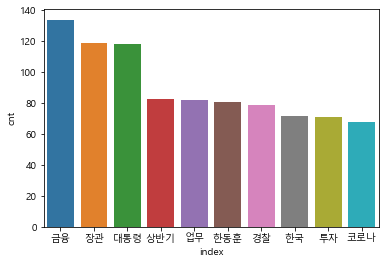

In [275]:
# 시각화
sns.barplot(x='index', y='cnt', data=df10, orient='v')

(-0.5, 1999.5, 1499.5, -0.5)

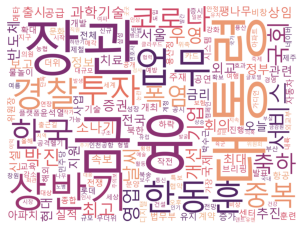

In [276]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=2000,height=1500).generate_from_frequencies(data)

plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 2999.5, 1999.5, -0.5)

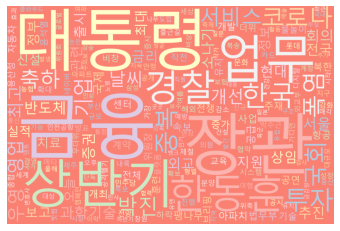

In [277]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate_from_frequencies(data)

plt.imshow(wordcloud)
plt.axis('off')

#### 정치

In [278]:
df_100 = df1.loc[(df1["category"]==264)|(df1["category"]==265)|(df1["category"]==268)|(df1["category"]==267)]
df_100

,news,category
0,尹 대통령 기업활동 위축시키는 과도한 형벌 규정 개선 지시,264
1,국방부 유엔사 판문점 통과 허용 북송 승인 의미는 아냐,264
2,포토 육군 대규모 항공작전 훈련,264
3,尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작,264
4,국내 7대 종단 지도자들 이명박 이재용 김경수 통큰 사면 요청,264
...,...,...
687,북 아사자 발생 놀랄 일 아냐,268
688,첫 대정부 질문 탈북어민 강제북송 흉악범이어도 잘못된 것,268
689,북 아사자 발생 놀랄 일 아냐,268
690,첫 대정부 질문 탈북어민 강제북송 흉악범이어도 잘못된 것,268


In [279]:
target = df_100['news'].values # 시리즈를 배열로
title_list = target.tolist() # 리스트로 변환
text = ' '.join(title_list) # 'space'로 공백주고 리스트로 결합 
text

'尹 대통령 기업활동 위축시키는 과도한 형벌 규정 개선 지시 국방부 유엔사 판문점 통과 허용 북송 승인 의미는 아냐   포토 육군 대규모 항공작전 훈련 尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작 국내 7대 종단 지도자들 이명박 이재용 김경수 통큰 사면 요청   정치+ 윤대통령 국기 문란 경찰 질타 경찰 내부 반발 고조 尹 대통령 최측근 한동훈 법무장관에 무슨 지시했나  尹대통령 법무행정 최우선은 경제 살리기 기업 위축하는 형벌규정 개선  문체부 청와대 활용 정부 내 혼선 없어 이미 정리   법무부 업무보고 한동훈 공수처 1년 국가 범죄대응 역량 약화  쌍용차 채권단 변제율 6 상식적이지 않아 尹대통령에 탄원 브리핑하는 한동훈 법무부장관 항명이냐 강압이냐 尹 대통령과 14만 경찰 대치 전선 고조 종합  尹 한동훈에 기업활동 위축 과도한 형벌 개선하라  윤대통령 경찰 집단행동 국기문란 경찰국 신설안 국무회의 통과  검수완박 이전으로 회귀 尹 한동훈에 수사권 강화 보고받아 국내 7대 종단 지도자들 이명박 이재용 김경수 통큰 특별사면 탄원 윤 대통령 한동훈에 법무행정 최우선 경제 살리기 당부 한동훈 檢티타임 부활 지적에 언론으로부터 불편 질문받아야  박홍근 경찰국 신설 이상민 행안부 장관의 행정 쿠데타   포토 육군 이천기지서 열린 대규모 항공작전 FTX 한동훈 박범계 검언유착 지적에 전정부는 흘리기 없었나  한동훈 제가 인사 평가 주제 넘어 現검증 시스템 안착 고민할 때  尹 법무행정 최우선 경제에 한동훈 이재용 사면 언급 부적절  공수처 尹 대통령 사적 채용 논란 고발 사건 수사 착수 공수처 尹대통령 사적채용 논란 고발건 수사1부 배당 尹대통령 기업 활동 위축 과도한 형벌 규정 개선  尹대통령 복심 한동훈 장관에 기업활동 위축 과도한 형벌규정 개선하라 지시 尹 한동훈 장관에 기업 위축시키는 과도한 형벌 개선하라   뉴스1 PICK 윤석열 대통령 경찰 집단 반발 국가 기강 문란   그래픽 경찰국 신설 행안부 직제 개정안 국무회의 통과 한동훈 공정과 상식으로

In [280]:
from konlpy.tag import Okt

okt = Okt() # okt 객체 생성
morph = okt.pos(text) # pos 메서드 : 단어와 품사를 뽑아주는 함수
noun_list = []
for word, tag in morph:
    if (tag=='Noun') & (len(word) > 1): # 태그가 ''Noun' & len(word) 2개이상 len(word)=1 는 조사이기에 불필요 
        noun_list.append(word) # 의미가 있는 단어만 추출해서 noun_list에 저장

# print(morph)
print(noun_list)

['대통령', '기업', '활동', '위축', '과도', '형벌', '규정', '개선', '지시', '국방부', '유엔', '판문점', '통과', '허용', '북송', '승인', '의미', '포토', '육군', '대규모', '항공', '작전', '훈련', '유럽', '아세안', '정상', '비즈니스', '외교', '시작', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '사면', '요청', '정치', '대통령', '국기', '문란', '경찰', '질타', '경찰', '내부', '반발', '고조', '대통령', '최측근', '한동훈', '법무', '장관', '무슨', '지시', '대통령', '법무', '행정', '우선', '경제', '기업', '위축', '형벌', '규정', '개선', '문체부', '청와대', '활용', '정부', '혼선', '정리', '법무부', '업무', '보고', '한동훈', '국가', '범죄', '대응', '역량', '약화', '쌍용차', '채권', '변제', '상식', '대통령', '탄원', '브리핑', '한동훈', '법무부', '장관', '강압', '대통령', '경찰', '대치', '전선', '고조', '종합', '한동훈', '기업', '활동', '위축', '과도', '형벌', '개선', '대통령', '경찰', '집단', '행동', '국기', '문란', '경찰', '신설', '국무회의', '통과', '수완', '이전', '회귀', '한동훈', '수사권', '강화', '보고', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '특별사면', '탄원', '대통령', '한동훈', '법무', '행정', '우선', '경제', '당부', '한동훈', '티타임', '부활', '지적', '언론', '불편', '질문', '박홍근', '경찰', '신설', '이상민', '행안부', '장관', '행정', '쿠데타', '포토', '육군', '기지', '대규모', '항공', '작전', '한동훈

In [281]:
# 불용어 list 처리
# 불용어 링크 : https://www.ranks.nl/stopwords/korean

with open('./stopwords.txt', "r",encoding='UTF8') as f:
    stop_words = f.readlines()
stop_words = "".join(stop_words)
stop_words = stop_words.split('\n')

konlpy = [noun_list]

noun_list= [noun for noun in noun_list if not noun in stop_words]

print(noun_list)

['대통령', '기업', '활동', '위축', '과도', '형벌', '규정', '개선', '지시', '국방부', '유엔', '판문점', '통과', '허용', '북송', '승인', '의미', '포토', '육군', '대규모', '항공', '작전', '훈련', '유럽', '아세안', '정상', '비즈니스', '외교', '시작', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '사면', '요청', '정치', '대통령', '국기', '문란', '경찰', '질타', '경찰', '내부', '반발', '고조', '대통령', '최측근', '한동훈', '법무', '장관', '지시', '대통령', '법무', '행정', '경제', '기업', '위축', '형벌', '규정', '개선', '문체부', '청와대', '활용', '정부', '혼선', '정리', '법무부', '업무', '보고', '한동훈', '국가', '범죄', '대응', '역량', '약화', '쌍용차', '채권', '변제', '상식', '대통령', '탄원', '브리핑', '한동훈', '법무부', '장관', '강압', '대통령', '경찰', '대치', '전선', '고조', '종합', '한동훈', '기업', '활동', '위축', '과도', '형벌', '개선', '대통령', '경찰', '집단', '행동', '국기', '문란', '경찰', '신설', '국무회의', '통과', '수완', '이전', '회귀', '한동훈', '수사권', '강화', '보고', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '특별사면', '탄원', '대통령', '한동훈', '법무', '행정', '경제', '당부', '한동훈', '티타임', '부활', '지적', '언론', '불편', '질문', '박홍근', '경찰', '신설', '이상민', '행안부', '장관', '행정', '쿠데타', '포토', '육군', '기지', '대규모', '항공', '작전', '한동훈', '박범계', '유착', '지

In [282]:
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font',family='Malgun Gothic') # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

count = Counter(noun_list)
data = dict(count.most_common())
series = pd.Series(data)
df = pd.DataFrame(series, columns=['cnt'])

# 반복되는 순위 정렬
df_100_10 = df.sort_values(by='cnt', ascending=False)[:10]
df_100_10.reset_index(inplace=True)
df_100_10

,index,cnt
0,대통령,115
1,장관,99
2,한동훈,81
3,경찰,78
4,국회,64
5,축하,62
6,박진,47
7,상임,46
8,업무,43
9,보고,43


<AxesSubplot:xlabel='index', ylabel='cnt'>

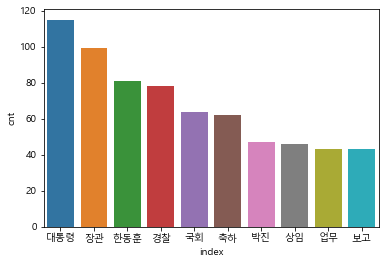

In [283]:
# 시각화
sns.barplot(x='index', y='cnt', data=df_100_10, orient='v')

(-0.5, 2999.5, 1999.5, -0.5)

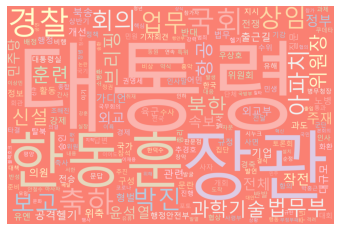

In [284]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate_from_frequencies(data)

plt.imshow(wordcloud)
plt.axis('off')

#### 경제

In [285]:
df_101 = df1.loc[(df1["category"]==259)|(df1["category"]==258)|(df1["category"]==261)|(df1["category"]==262)|(df1["category"]==260)]
df_101

,news,category
692,시중은행 전체로 번진 수상한 외환거래 은행 제재 불가피,259
693,현대해상 코로나로 미뤘던 해외사업 속도,259
694,10년간 동일 업무 담당한 우리은행 횡령범 명령휴가 대상도 아니었다,259
695,농협금융 상반기 순이익 1조3505억원 사상 최대 전년比 5 3 증가,259
696,신한라이프 MZ세대 겨냥 콘텐츠로 보험 유튜브 분야 대상 수상,259
...,...,...
1622,신 新 교통거점 거듭나는 용산 지하도로 링킹파크 에 도심항공까지,260
1623,현대건설 힐스테이트 서대구역 센트럴 오피스텔 27일 청약,260
1624,주거 투자 가치 남다른 아끌레르 광진 프리미어 스위트 28일 청약접수 진행,260
1625,용산정비창 용적률 1500 초과 고밀개발 초고층빌딩 올린다,260


In [286]:
target = df_101['news'].values # 시리즈를 배열로
title_list = target.tolist() # 리스트로 변환
text = ' '.join(title_list) # 'space'로 공백주고 리스트로 결합 
text

'시중은행 전체로 번진 수상한 외환거래 은행 제재 불가피  현대해상 코로나로 미뤘던 해외사업 속도 10년간 동일 업무 담당한 우리은행 횡령범 명령휴가 대상도 아니었다 농협금융 상반기 순이익 1조3505억원 사상 최대 전년比 5 3 증가 신한라이프 MZ세대 겨냥 콘텐츠로 보험 유튜브 분야 대상 수상 KB증권 SK C C와 디지털자산 플랫폼 구축 협약 NH농협금융 상반기 순이익 1조3505억원 건전성 개선  JB금융 상반기 순이익 3200억원 역대 최대 전년比 15 증가  경제 하반기 성장세 둔화 올해 성장률 2 대 초중반 전망 종합  금융위 금융안정계정 도입한다 금융사 부실 예방 효과 기대  토스뱅크 1000억원 규모 유상증자 총 1조500억원 확보 JB금융그룹 상반기 순이익 3천200억원 전년 동기 대비 15  한국은행 금통위원에 신성환 홍익대 교수 추천  게시판 KB증권 SK C C와 디지털자산 플랫폼 구축 협약 금리상승 하락장에 증권사 2분기 실적 암울 이익 반토막  빗썸 최대주주 비덴트 FTX와 접촉 사실 아직 정해진 건 없다  토스뱅크 1000억 유상증자 결의 총 1조500억 자본금 확보 빗썸 최대주주 비덴트 FTX에 빗썸 매각 협의 중   암호화폐 협의체 뭐하나 유의종목 지정 후 나 몰라라 하는 거래소 광주은행 전남 관광지 방문 고객 우대 금리 적금 출시 농협생명 재무 건전성 우려 불식 RBC비율 정상 궤도   삼성 iD MOVE 카드 MZ세대 맞춤형카드로 인기  농협은행 광주영업본부 소외계층학생에 행복나눔쌀 1200포 전달  게시판 신한은행 한국금융사박물관 여름방학 교육 프로그램 시행 손병환 웃었다 농협금융 사상 최대 실적 달성 전주 찾은 금감원장 불법금융 피해 예방 캠페인 전주 찾은 금감원장 불법금융 피해 예방 캠페인 농협금융 올해 상반기 순익 1조 3505억원 지주 출범 후 최대 우리종합금융 신규 휴면고객 대상 골드바 등 경품 이벤트 전북경찰청장 불법금융 피해 예방 캠페인  불법금융 피해 예방 안내문 나눠주는 금감원장 JB금융 상반기 순익 320

In [287]:
from konlpy.tag import Okt

okt = Okt() # okt 객체 생성
morph = okt.pos(text) # pos 메서드 : 단어와 품사를 뽑아주는 함수
noun_list = []
for word, tag in morph:
    if (tag=='Noun') & (len(word) > 1): # 태그가 ''Noun' & len(word) 2개이상 len(word)=1 는 조사이기에 불필요 
        noun_list.append(word) # 의미가 있는 단어만 추출해서 noun_list에 저장

# print(morph)
print(noun_list)

['시중', '은행', '전체', '번진', '수상한', '외환거래', '은행', '제재', '불가피', '현대', '해상', '코로나', '해외', '사업', '속도', '동일', '업무', '담당', '우리은행', '횡령', '명령', '휴가', '대상', '농협', '금융', '상반기', '순이익', '사상', '최대', '증가', '라이프', '세대', '겨냥', '콘텐츠', '보험', '유튜브', '분야', '대상', '수상', '증권', '디지털', '자산', '플랫폼', '구축', '협약', '농협', '금융', '상반기', '순이익', '건전성', '개선', '금융', '상반기', '순이익', '역대', '최대', '증가', '경제', '하반기', '성장', '둔화', '올해', '성장', '중반', '전망', '종합', '금융위', '금융', '안정', '계정', '도입', '금융', '부실', '예방', '효과', '기대', '토스', '뱅크', '규모', '유상증자', '확보', '금융', '그룹', '상반기', '순이익', '동기', '대비', '한국은행', '금통위', '신성환', '홍익대', '교수', '추천', '게시판', '증권', '디지털', '자산', '플랫폼', '구축', '협약', '금리', '상승', '하락', '증권사', '실적', '이익', '반토막', '빗썸', '최대', '주주', '덴트', '접촉', '사실', '정해진', '토스', '뱅크', '유상증자', '결의', '자본금', '확보', '빗썸', '최대', '주주', '덴트', '빗썸', '매각', '협의', '암호', '화폐', '협의', '하나', '유의', '종목', '지정', '거래소', '광주', '은행', '전남', '관광지', '방문', '고객', '우대', '금리', '적금', '출시', '농협생명', '재무', '건전성', '우려', '비율', '정상', '궤도', '삼성', '카드', '세대', '맞춤', '카드', '인기', '농협', '

In [288]:
# 불용어 list 처리
# 불용어 링크 : https://www.ranks.nl/stopwords/korean

with open('./stopwords.txt', "r",encoding='UTF8') as f:
    stop_words = f.readlines()
stop_words = "".join(stop_words)
stop_words = stop_words.split('\n')

konlpy = [noun_list]

noun_list= [noun for noun in noun_list if not noun in stop_words]

print(noun_list)

['시중', '은행', '전체', '번진', '수상한', '외환거래', '은행', '제재', '불가피', '현대', '해상', '코로나', '해외', '사업', '속도', '동일', '업무', '담당', '우리은행', '횡령', '명령', '휴가', '대상', '농협', '금융', '상반기', '순이익', '사상', '최대', '증가', '라이프', '세대', '겨냥', '콘텐츠', '보험', '유튜브', '분야', '대상', '수상', '증권', '디지털', '자산', '플랫폼', '구축', '협약', '농협', '금융', '상반기', '순이익', '건전성', '개선', '금융', '상반기', '순이익', '역대', '최대', '증가', '경제', '하반기', '성장', '둔화', '올해', '성장', '중반', '전망', '종합', '금융위', '금융', '안정', '계정', '도입', '금융', '부실', '예방', '효과', '기대', '토스', '뱅크', '규모', '유상증자', '확보', '금융', '그룹', '상반기', '순이익', '동기', '대비', '한국은행', '금통위', '신성환', '홍익대', '교수', '추천', '게시판', '증권', '디지털', '자산', '플랫폼', '구축', '협약', '금리', '상승', '하락', '증권사', '실적', '이익', '반토막', '빗썸', '최대', '주주', '덴트', '접촉', '사실', '정해진', '토스', '뱅크', '유상증자', '결의', '자본금', '확보', '빗썸', '최대', '주주', '덴트', '빗썸', '매각', '협의', '암호', '화폐', '협의', '유의', '종목', '지정', '거래소', '광주', '은행', '전남', '관광지', '방문', '고객', '우대', '금리', '적금', '출시', '농협생명', '재무', '건전성', '우려', '비율', '정상', '궤도', '삼성', '카드', '세대', '맞춤', '카드', '인기', '농협', '은행', '

In [289]:
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font',family='Malgun Gothic') # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

count = Counter(noun_list)
data = dict(count.most_common())
series = pd.Series(data)
df = pd.DataFrame(series, columns=['cnt'])

# 반복되는 순위 정렬
df_101_10 = df.sort_values(by='cnt', ascending=False)[:10]
df_101_10.reset_index(inplace=True)
df_101_10

,index,cnt
0,금융,132
1,상반기,56
2,영업,51
3,금리,45
4,지원,38
5,현대,35
6,투자,34
7,공급,33
8,한국,32
9,서울,31


<AxesSubplot:xlabel='index', ylabel='cnt'>

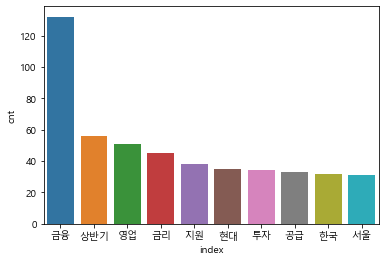

In [290]:
# 시각화
sns.barplot(x='index', y='cnt', data=df_101_10, orient='v')

(-0.5, 2999.5, 1999.5, -0.5)

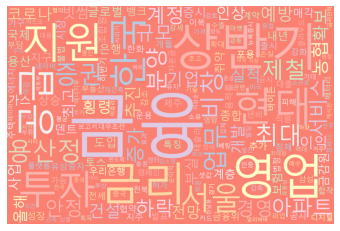

In [291]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate_from_frequencies(data)

plt.imshow(wordcloud)
plt.axis('off')

#### 생활/문화

In [292]:
df_103 = df1.loc[(df1["category"]==241)|(df1["category"]==237)|(df1["category"]==242)|(df1["category"]==248)|(df1["category"]==245)]
df_103

,news,category
1627,이종이식 한걸음 가까워진다,241
1628,86세 여성 CEO가 말하는 100세까지 건강하게 사는 법 호기심 그리고 메모하기 ...,241
1629,악몽도 심하면 병 벗어나는 방법은,241
1630,환경보건시민센터 휴대용 선풍기 전자파 측정,241
1631,낮잠 자주 자면 혈압 높아진다,241
...,...,...
2450,고물가에 통신비도 짠소비 위메프 알뜰폰 자급제폰 결합 인기,245
2451,지상갤러리,245
2452,7개 전국국제공항 2년 5개월 만에 국제선 하늘길 활짝,245
2453,국립문화재연구원 파주 육계토성 백제 초 축조 확인,245


In [293]:
target = df_103['news'].values # 시리즈를 배열로
title_list = target.tolist() # 리스트로 변환
text = ' '.join(title_list) # 'space'로 공백주고 리스트로 결합 
text

'이종이식 한걸음 가까워진다 86세 여성 CEO가 말하는 100세까지 건강하게 사는 법 호기심 그리고 메모하기 인터뷰  악몽도 심하면 병 벗어나는 방법은  환경보건시민센터 휴대용 선풍기 전자파 측정  낮잠 자주 자면 혈압 높아진다   부산엑스포 유치 부산과 대한민국 미래 걸렸다  부광약품 조현병 치료제 연내 신약허가 신청 소식에 주가 Why 바이오  거창항노화힐링랜드 웰니스관광지 선정 산림관광산업 중심지로 아토피 피부염을 악화하는 뜻밖의 원인 4  속보영상 질병청 2차 접종자 코로나 감염 후 심근경색 뇌경색 위험도 낮다   게시판 넛지헬스케어 다이어트 앱 지니어트 에 생리 캘린더 기능 추가 종근당 국내최초 말초신경병증 간기능 개선 성분 벤포벨 에스 출시 환경보건시민센터 휴대용 선풍기 전자파 측정  2차 접종자 코로나 감염 후 심근경색 뇌경색 발생 위험 낮아져  모기에 물리면 식초 양파즙 등 손쉬운 대처법 크리스탈지노믹스 제이앤씨사이언스 팍스로비드와 동일기전 코로나 치료제 개발 착수 갑자기 찐 살 주 이내에 빨리 빼야 하는 이유  2차접종자 코로나 감염 후 심혈관계질환 위험 절반 이하   스트레스 저리 가 하이원리조트에서 힐링하세요  췌장암 환자 계속 증가한다 2040년 연간 1만6천명 발생 전망  여름철 물놀이 할 때 콘텍트렌즈 끼면 안돼 심한 생리통 난임 유발 자궁선근증 원인 찾았다 필립스코리아 원더오브유 Wonder of You 캠페인  켄타우로스 변이 확산 이중고 코로나19 신규확진 10만명 초읽기 휴젤 보툴렉스 미간주름 개선 효과 장기 투여에도 유효성 안전성 입증  시각장애인의 눈 지팡이 초음파 기술로 기능 향상 앞둬 담배 피워도 건강 슈퍼 혈관 비밀 밝혀졌다 자폐증 일으키는 새 유전자 변이 찾았다 식약처 콘택트렌즈 끼고 물놀이하면 세균 곰팡이 감염 위험   코로나 한번도 안 걸렸다고 곰곰이 생각해보세요  전북도교육청 학생건강증진센터 운영 위탁기관 공모  약손+ 물⑧ 비싼 외국 생수보다 더 좋은 물이 대구에  생명연 파킨슨병 유발 유전자 SYT11 위암

In [294]:
from konlpy.tag import Okt

okt = Okt() # okt 객체 생성
morph = okt.pos(text) # pos 메서드 : 단어와 품사를 뽑아주는 함수
noun_list = []
for word, tag in morph:
    if (tag=='Noun') & (len(word) > 1): # 태그가 ''Noun' & len(word) 2개이상 len(word)=1 는 조사이기에 불필요 
        noun_list.append(word) # 의미가 있는 단어만 추출해서 noun_list에 저장

# print(morph)
print(noun_list)

['이종이식', '걸음', '여성', '호기심', '메모', '인터뷰', '악몽', '방법', '환경', '보건', '시민', '센터', '휴대', '선풍기', '전자파', '측정', '낮잠', '자주', '혈압', '부산', '엑스포', '유치', '부산', '대한민국', '미래', '부광약품', '조현병', '치료', '연내', '신약', '허가', '신청', '소식', '주가', '바이오', '거창', '항노화', '힐링', '랜드', '니스', '관광지', '선정', '산림', '관광', '산업', '중심지', '아토피', '피부염', '악화', '뜻밖', '원인', '속보', '영상', '질병', '접종', '코로나', '감염', '심근경색', '뇌경색', '위험', '게시판', '넛지헬', '스케', '다이어트', '생리', '캘린더', '기능', '추가', '종근당', '국내', '최초', '말초신경', '병증', '기능', '개선', '성분', '포벨', '에스', '출시', '환경', '보건', '시민', '센터', '휴대', '선풍기', '전자파', '측정', '접종', '코로나', '감염', '심근경색', '뇌경색', '발생', '위험', '모기', '물리', '식초', '양파', '대처', '크리스탈', '지노', '믹스', '사이언스', '팍스', '비드', '동일', '기전', '코로나', '치료', '개발', '착수', '갑자기', '이내', '이유', '접종', '코로나', '감염', '심혈관계', '질환', '위험', '절반', '이하', '스트레스', '저리', '하이원리조트', '힐링', '췌장암', '환자', '계속', '증가', '연간', '발생', '전망', '여름철', '물놀이', '콘텍트', '렌즈', '생리통', '난임', '유발', '자궁', '선근', '원인', '필립스', '코리아', '원더', '오브', '캠페인', '켄타우로스', '확산', '이중고', '코로나', '신규', '확진', '초읽기', '보툴'

In [295]:
# 불용어 list 처리
# 불용어 링크 : https://www.ranks.nl/stopwords/korean

with open('./stopwords.txt', "r",encoding='UTF8') as f:
    stop_words = f.readlines()
stop_words = "".join(stop_words)
stop_words = stop_words.split('\n')

konlpy = [noun_list]

noun_list= [noun for noun in noun_list if not noun in stop_words]

print(noun_list)

['이종이식', '걸음', '여성', '호기심', '메모', '인터뷰', '악몽', '방법', '환경', '보건', '시민', '센터', '휴대', '선풍기', '전자파', '측정', '낮잠', '자주', '혈압', '부산', '엑스포', '유치', '부산', '대한민국', '미래', '부광약품', '조현병', '치료', '연내', '신약', '허가', '신청', '소식', '주가', '바이오', '거창', '항노화', '힐링', '랜드', '니스', '관광지', '선정', '산림', '관광', '산업', '중심지', '아토피', '피부염', '악화', '뜻밖', '원인', '속보', '영상', '질병', '접종', '코로나', '감염', '심근경색', '뇌경색', '위험', '게시판', '넛지헬', '스케', '다이어트', '생리', '캘린더', '기능', '추가', '종근당', '국내', '최초', '말초신경', '병증', '기능', '개선', '성분', '포벨', '에스', '출시', '환경', '보건', '시민', '센터', '휴대', '선풍기', '전자파', '측정', '접종', '코로나', '감염', '심근경색', '뇌경색', '발생', '위험', '모기', '물리', '식초', '양파', '대처', '크리스탈', '지노', '믹스', '사이언스', '팍스', '비드', '동일', '기전', '코로나', '치료', '개발', '착수', '갑자기', '이내', '이유', '접종', '코로나', '감염', '심혈관계', '질환', '위험', '절반', '이하', '스트레스', '저리', '하이원리조트', '힐링', '췌장암', '환자', '계속', '증가', '연간', '발생', '전망', '여름철', '물놀이', '콘텍트', '렌즈', '생리통', '난임', '유발', '자궁', '선근', '원인', '필립스', '코리아', '원더', '오브', '캠페인', '켄타우로스', '확산', '이중고', '코로나', '신규', '확진', '초읽기', '보툴'

In [296]:
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font',family='Malgun Gothic') # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

count = Counter(noun_list)
data = dict(count.most_common())
series = pd.Series(data)
df = pd.DataFrame(series, columns=['cnt'])

# 반복되는 순위 정렬
df_103_10 = df.sort_values(by='cnt', ascending=False)[:10]
df_103_10.reset_index(inplace=True)
df_103_10

,index,cnt
0,중복,66
1,폭염,61
2,날씨,59
3,소나기,51
4,우영,46
5,팽나무,41
6,오늘,40
7,공연,33
8,더위,33
9,물놀이,32


<AxesSubplot:xlabel='index', ylabel='cnt'>

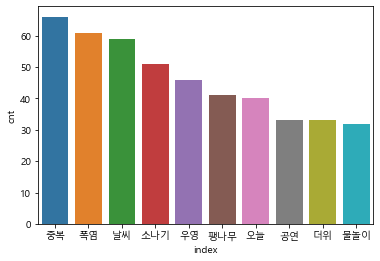

In [297]:
# 시각화
sns.barplot(x='index', y='cnt', data=df_103_10, orient='v')

(-0.5, 2999.5, 1999.5, -0.5)

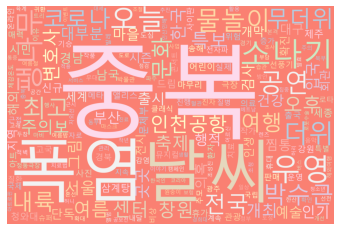

In [298]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate_from_frequencies(data)

plt.imshow(wordcloud)
plt.axis('off')

#### IT/과학

In [299]:
df_105 = df1.loc[(df1["category"]==227)|(df1["category"]==230)|(df1["category"]==283)|(df1["category"]==228)]
df_105

,news,category
2455,SKT 누구 안심 개편 5개월 만에 서비스 종료 왜,227
2456,디지털 융합 K 콘텐츠의 힘 SK텔레콤 스튜디오 연결로 제작 초협력 지원,227
2457,디지털 융합 K 콘텐츠의 힘 CJ ENM 32K 초고화질 버추얼 제작 지원,227
2458,KT 이지스 디지털트윈 분야 협력 현실과 같은 가상공간 구축한다,227
2459,무선국 제도개선 민관협의체 8월 초 킥오프 규제 완화 논의,227
...,...,...
3049,프랑스 유텔샛 스페이스X 게 섰거라,228
3050,크리스탈지노믹스 제이앤씨사이언스와 코로나19 치료제 후보 발굴,228
3051,세상에서 가장 작은 반도체 구조 규명,228
3052,클래시스 알파 복부 지방감소 효과 연구 국제학술지 게재,228


In [300]:
target = df_105['news'].values # 시리즈를 배열로
title_list = target.tolist() # 리스트로 변환
text = ' '.join(title_list) # 'space'로 공백주고 리스트로 결합 
text

'SKT 누구 안심 개편 5개월 만에 서비스 종료 왜   디지털 융합 K 콘텐츠의 힘 SK텔레콤 스튜디오 연결로 제작 초협력 지원  디지털 융합 K 콘텐츠의 힘 CJ ENM 32K 초고화질 버추얼 제작 지원 KT 이지스 디지털트윈 분야 협력 현실과 같은 가상공간 구축한다  무선국 제도개선 민관협의체 8월 초 킥오프 규제 완화 논의 U+아이들나라 신인작가 그림책 콘텐츠 담는다 상반기 5G 통신분쟁 급증 KT 신청건수 해결률 가장 많아 U+아이들나라 신인 작가 창작 그림책 읽어주기 서비스 KT 이지스와 디지털 트윈 사업 확대 위한 업무협약 체결 씨에스리 데이터분석 빅재미 공공기관 디지털 행정 서비스 도구 주목 5G 통신분쟁 해결률 44 7 84 7 대폭 상승 이즈파크 6 대역 기반 차세대 스마트공장 서비스 실증 착수 LG헬로비전 헬로tv UI UX 전면 개편 고압송전선 수준 국립전파연구원 휴대용 목 선풍기 전자파 양호  110년 만에 지적재조사 LX 부산서 라이다 드론 등 신기술 시연 음저협 IPTV 방송사용료 청구소송 최종 승소 U+아이들나라 신인 작가 창작 그림책 독점 제공  포스트 우영우 노린다 ENA 하반기 라인업 공개  휴대용 선풍기 전자파 인체보호 기준 충족  방통위 2021년 상반기 통신분쟁조정 해결률 84 3  KT 이지스와 디지털 트윈 플랫폼 구축 맞손  티빙 오리지널 돼지의 왕 북미 최대 장르 영화제서 호평 방통위 올 상반기 통신분쟁 477건 유 무선 KT가 가장 많아 네이버웹툰 블랙 프라이데이 캠퍼스 로맨스 지상최대공모전 대상작 선정 상반기 5G 통신분쟁 신청 건수 187 급증 U+아이들나라 신인 작가 창작 그림책 독점 제공 LGU+ 아이들나라서 신인작가 그림책 공개  우영우 하나로 대박난 ENA 하반기 라인업 굿잡 등 예고 전세계 IT용 OLED 생산면적 여의도만큼 커진다 삼성D 초격차 유지  우영우 로 대박난 ENA 후속 라인업 공개 LG디스플레이 사무동 전력 100 신재생에너지 전환 지속가능경영보고서 발간 네카오가 인정한 아바타 장인 권승

In [301]:
from konlpy.tag import Okt

okt = Okt() # okt 객체 생성
morph = okt.pos(text) # pos 메서드 : 단어와 품사를 뽑아주는 함수
noun_list = []
for word, tag in morph:
    if (tag=='Noun') & (len(word) > 1): # 태그가 ''Noun' & len(word) 2개이상 len(word)=1 는 조사이기에 불필요 
        noun_list.append(word) # 의미가 있는 단어만 추출해서 noun_list에 저장

# print(morph)
print(noun_list)

['누구', '안심', '개편', '개월', '서비스', '종료', '디지털', '융합', '콘텐츠', '텔레콤', '스튜디오', '연결', '제작', '협력', '지원', '디지털', '융합', '콘텐츠', '초고', '화질', '버추', '제작', '지원', '이지스', '디지털', '트윈', '분야', '협력', '현실', '가상공간', '구축', '무선', '제도', '개선', '민관', '협의', '오프', '규제', '완화', '논의', '아이', '나라', '신인', '작가', '그림책', '콘텐츠', '상반기', '통신', '분쟁', '급증', '신청', '건수', '해결', '가장', '아이', '나라', '신인', '작가', '창작', '그림책', '서비스', '이지스', '디지털', '트윈', '사업', '확대', '업무', '협약', '체결', '스리', '데이터', '분석', '재미', '공공기관', '디지털', '행정', '서비스', '도구', '주목', '통신', '분쟁', '해결', '대폭', '상승', '이즈', '파크', '대역', '기반', '차세대', '스마트', '공장', '서비스', '실증', '착수', '헬로비전', '헬로', '전면', '개편', '압송', '전선', '수준', '국립', '전파', '연구원', '휴대', '선풍기', '전자파', '양호', '적재', '조사', '부산', '라이', '드론', '기술', '시연', '음저협', '방송', '사용', '청구', '소송', '최종', '승소', '아이', '나라', '신인', '작가', '창작', '그림책', '독점', '제공', '포스트', '우영', '하반기', '라인업', '공개', '휴대', '선풍기', '전자파', '인체', '보호', '기준', '충족', '방통위', '상반기', '통신', '분쟁', '조정', '해결', '이지스', '디지털', '트윈', '플랫폼', '구축', '티빙', '리지', '돼지', '북미', '최대', '장르', '

In [302]:
# 불용어 list 처리
# 불용어 링크 : https://www.ranks.nl/stopwords/korean

with open('./stopwords.txt', "r",encoding='UTF8') as f:
    stop_words = f.readlines()
stop_words = "".join(stop_words)
stop_words = stop_words.split('\n')

konlpy = [noun_list]

noun_list= [noun for noun in noun_list if not noun in stop_words]

print(noun_list)

['안심', '개편', '개월', '서비스', '종료', '디지털', '융합', '콘텐츠', '텔레콤', '스튜디오', '연결', '제작', '협력', '지원', '디지털', '융합', '콘텐츠', '초고', '화질', '버추', '제작', '지원', '이지스', '디지털', '트윈', '분야', '협력', '현실', '가상공간', '구축', '무선', '제도', '개선', '민관', '협의', '오프', '규제', '완화', '논의', '나라', '신인', '작가', '그림책', '콘텐츠', '상반기', '통신', '분쟁', '급증', '신청', '건수', '해결', '가장', '나라', '신인', '작가', '창작', '그림책', '서비스', '이지스', '디지털', '트윈', '사업', '확대', '업무', '협약', '체결', '스리', '데이터', '분석', '재미', '공공기관', '디지털', '행정', '서비스', '도구', '주목', '통신', '분쟁', '해결', '대폭', '상승', '이즈', '파크', '대역', '기반', '차세대', '스마트', '공장', '서비스', '실증', '착수', '헬로비전', '헬로', '전면', '개편', '압송', '전선', '수준', '국립', '전파', '연구원', '휴대', '선풍기', '전자파', '양호', '적재', '조사', '부산', '라이', '드론', '기술', '시연', '음저협', '방송', '사용', '청구', '소송', '최종', '승소', '나라', '신인', '작가', '창작', '그림책', '독점', '제공', '포스트', '우영', '하반기', '라인업', '공개', '휴대', '선풍기', '전자파', '인체', '보호', '기준', '충족', '방통위', '상반기', '통신', '분쟁', '조정', '해결', '이지스', '디지털', '트윈', '플랫폼', '구축', '티빙', '리지', '돼지', '북미', '최대', '장르', '영화제', '호평', '방통위', '상반기'

In [303]:
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font',family='Malgun Gothic') # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

count = Counter(noun_list)
data = dict(count.most_common())
series = pd.Series(data)
df = pd.DataFrame(series, columns=['cnt'])

# 반복되는 순위 정렬
df_105_10 = df.sort_values(by='cnt', ascending=False)[:10]
df_105_10.reset_index(inplace=True)
df_105_10

,index,cnt
0,반도체,42
1,투자,35
2,서비스,35
3,자동차,31
4,치료,27
5,가장,25
6,교육,24
7,유지,22
8,나무,22
9,계약,22


<AxesSubplot:xlabel='index', ylabel='cnt'>

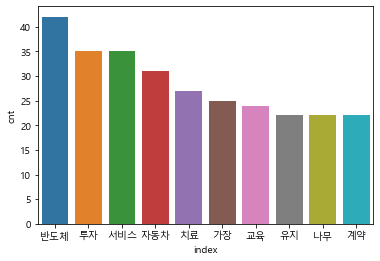

In [304]:
# 시각화
sns.barplot(x='index', y='cnt', data=df_105_10, orient='v')

(-0.5, 2999.5, 1999.5, -0.5)

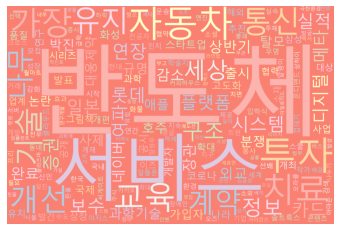

In [305]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate_from_frequencies(data)

plt.imshow(wordcloud)
plt.axis('off')